In [41]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\placement ML Day-42.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
133,7.65,64.0,1
933,6.01,9.0,0
235,7.20,52.0,1
353,6.82,28.0,1
519,6.60,8.0,1


In [43]:
df.shape

(1000, 3)

C:\Users\acz\AppData\Local\Temp\ipykernel_17800\533513279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\Users\acz\AppData\Local\Temp\ipykernel_17800\533513279.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],hist=Fal

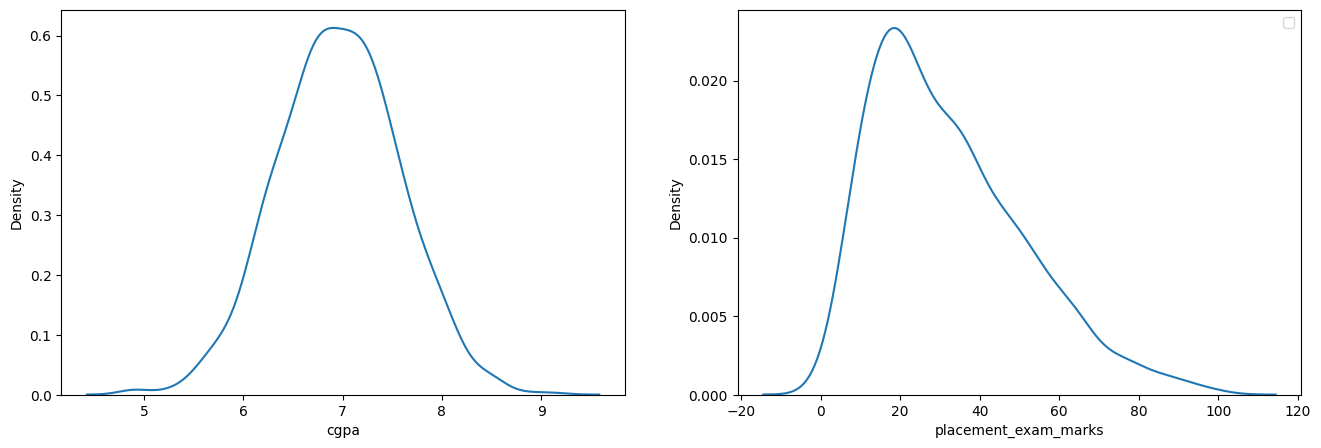

In [44]:
plt.figure(figsize=((16,5)))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],hist=False)

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.legend()
plt.show()

since marks are skewed distribution use IQR

In [45]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

In [46]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

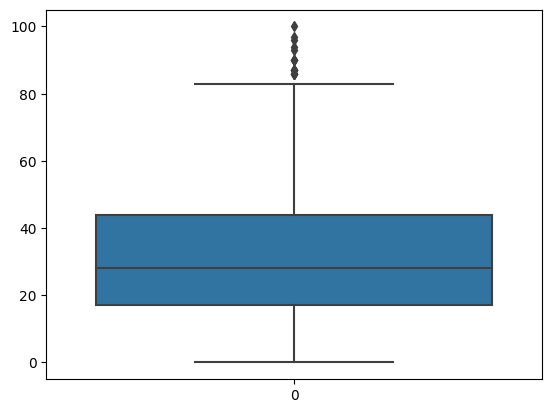

In [47]:
sns.boxplot(df['placement_exam_marks'])

In [48]:
#Find IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [49]:
percentile25

17.0

In [50]:
percentile75

44.0

In [51]:
iqr=percentile75-percentile25
iqr

27.0

In [52]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [53]:
lower_limit

-23.5

In [54]:
upper_limit

84.5

# Trimmimg


In [55]:
new_df=df[(df['placement_exam_marks']>lower_limit) & (df['placement_exam_marks']<upper_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\acz\AppData\Local\Temp\ipykernel_17800\3540356298.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


C:\Users\acz\AppData\Local\Temp\ipykernel_17800\3540356298.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: >

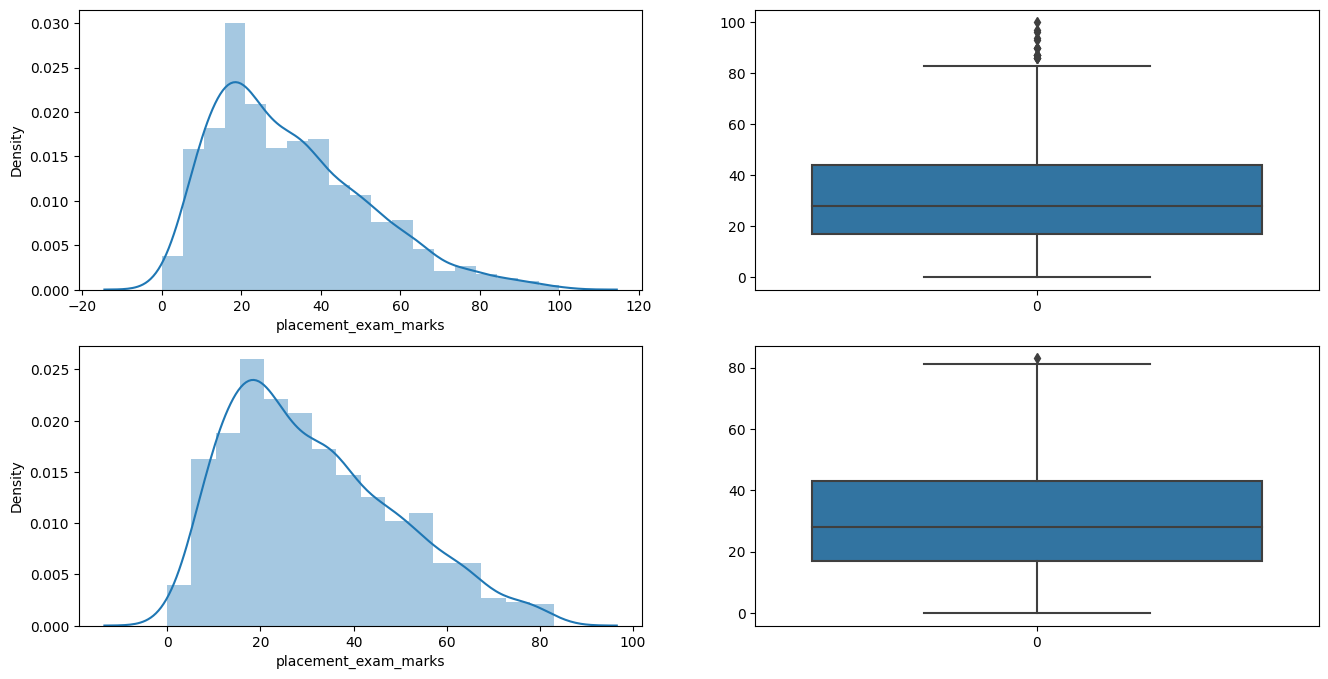

In [56]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

# Capping

In [60]:
new_df_cap= df.copy()
new_df_cap['placement_exam_marks']=np.where(new_df_cap['placement_exam_marks'] > upper_limit,upper_limit,
                                            np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks'])
                                            )
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [58]:
new_df_cap.shape

(1000, 3)

C:\Users\acz\AppData\Local\Temp\ipykernel_17800\410395269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\acz\AppData\Local\Temp\ipykernel_17800\410395269.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


<Axes: >

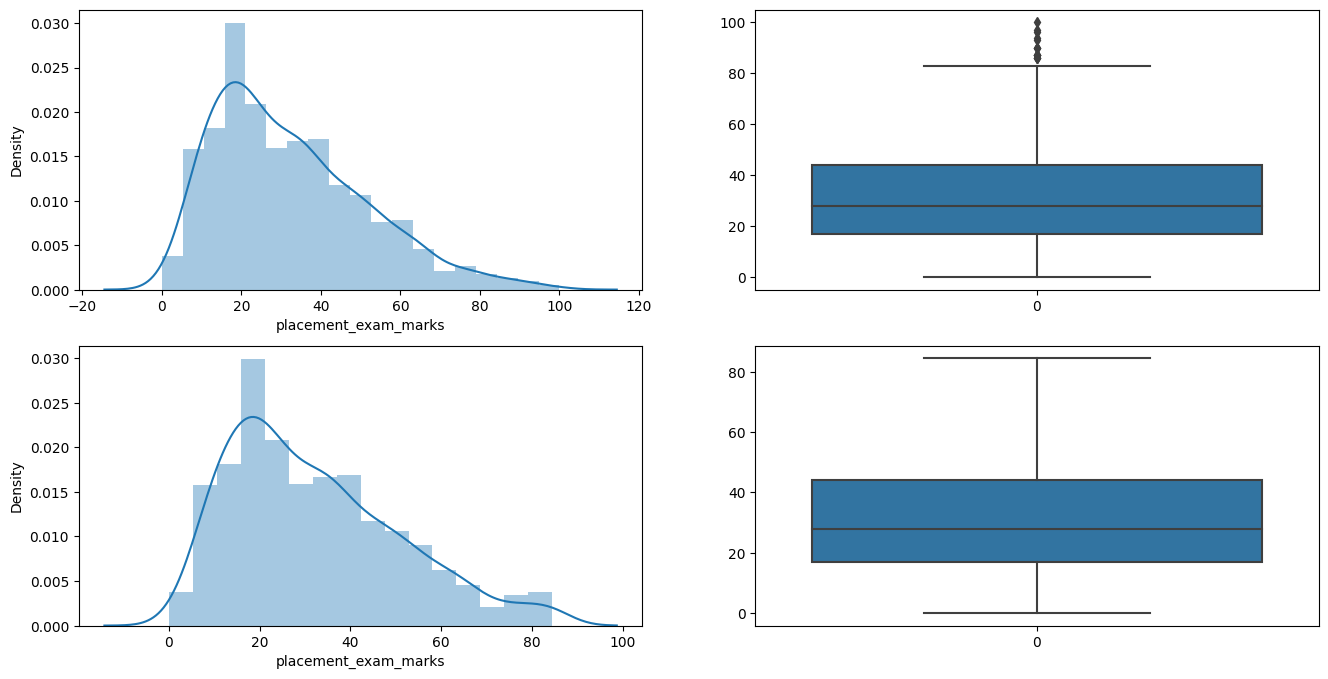

In [61]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])